In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import sys
sys.path.insert(0, "../"*2)
import warnings
warnings.filterwarnings('ignore')

In [63]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, Decay
import numpy as np

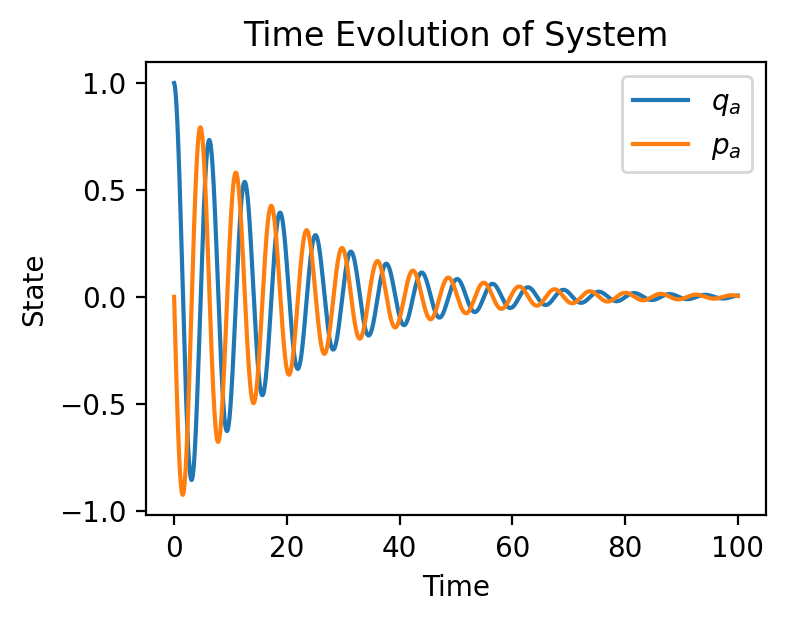

In [82]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 1.0, "kappa_a": 0.0, "kerr_a":0.0, "gamma_a":0.100}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 100, 100001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [83]:
decay = Decay(sys, x_0, ts)
decay.calculate(X)

array([0.0990024, 0.0990024])

In [84]:
decay.sensitivity("gamma_a")

array([1.00004917, 1.00004925])